In [162]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [163]:
df = pd.read_csv('/content/IRIS.csv')

In [164]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [165]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [166]:
df['species'] = encoder.fit_transform(df['species'])

In [167]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [168]:
df = df[df['species']!=0][['sepal_width','petal_length','species']]

In [169]:
df.head()

,sepal_width,petal_length,species
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1


In [170]:
import seaborn as sns
import matplotlib.pyplot as plt

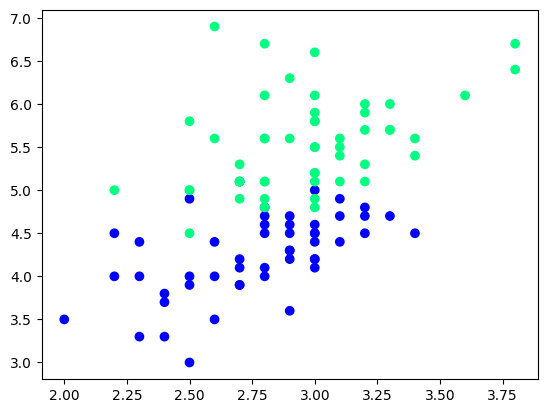

In [171]:
plt.scatter(df['sepal_width'],df['petal_length'],c = df['species'],cmap = 'winter')

In [172]:
df

,sepal_width,petal_length,species
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1
...,...,...,...
145,3.0,5.2,2
146,2.5,5.0,2
147,3.0,5.2,2
148,3.4,5.4,2


In [173]:
df_train = df.iloc[:60,:].sample(10)
df_train

,sepal_width,petal_length,species
80,2.4,3.8,1
100,3.3,6.0,2
65,3.1,4.4,1
109,3.6,6.1,2
63,2.9,4.7,1
73,2.8,4.7,1
53,2.3,4.0,1
69,2.5,3.9,1
50,3.2,4.7,1
66,3.0,4.5,1


In [174]:
# Taking only 10 rows for training .....
df = df.sample(100)
df_train = df.iloc[:60,:].sample(10)
df_val = df.iloc[60:80,:].sample(5)
df_test = df.iloc[80:,:].sample(5)

In [175]:
df_train

,sepal_width,petal_length,species
95,3.0,4.2,1
71,2.8,4.0,1
143,3.2,5.9,2
129,3.0,5.8,2
97,2.9,4.3,1
76,2.8,4.8,1
53,2.3,4.0,1
91,3.0,4.6,1
117,3.8,6.7,2
73,2.8,4.7,1


In [176]:
df.sample(100)

,sepal_width,petal_length,species
80,2.4,3.8,1
85,3.4,4.5,1
102,3.0,5.9,2
60,2.0,3.5,1
110,3.2,5.1,2
...,...,...,...
82,2.7,3.9,1
128,2.8,5.6,2
134,2.6,5.6,2
149,3.0,5.1,2


In [177]:
print(df_train,'\n\n\n')
print(df_val,'\n\n\n')
print(df_test,'\n\n\n')

     sepal_width  petal_length  species
95           3.0           4.2        1
71           2.8           4.0        1
143          3.2           5.9        2
129          3.0           5.8        2
97           2.9           4.3        1
76           2.8           4.8        1
53           2.3           4.0        1
91           3.0           4.6        1
117          3.8           6.7        2
73           2.8           4.7        1 



     sepal_width  petal_length  species
120          3.2           5.7        2
51           3.2           4.5        1
59           2.7           3.9        1
89           2.5           4.0        1
100          3.3           6.0        2 



     sepal_width  petal_length  species
98           2.5           3.0        1
69           2.5           3.9        1
108          2.5           5.8        2
75           3.0           4.4        1
52           3.1           4.9        1 





In [178]:
X_test = df_val.iloc[:,0:2].values
y_test = df_val.iloc[:,-1].values

In [179]:
X_test

array([[3.2, 5.7],
       [3.2, 4.5],
       [2.7, 3.9],
       [2.5, 4. ],
       [3.3, 6. ]])

In [180]:
y_test

array([2, 1, 1, 1, 2])

# Case 1 - Bagging

In [181]:
# Data For tree 1
df_bag = df_train.sample(8,replace= True)

X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]


df_bag

,sepal_width,petal_length,species
143,3.2,5.9,2
53,2.3,4.0,1
71,2.8,4.0,1
129,3.0,5.8,2
71,2.8,4.0,1
73,2.8,4.7,1
73,2.8,4.7,1
97,2.9,4.3,1


In [182]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

In [183]:
def evaluate(clf,X,y):
  clf.fit(X,y)
  plot_tree(clf)
  plt.show()
  plot_decision_regions(X.values,y.values,clf = clf,legend =2)
  y_pred = clf.predict(X_test)
  print(accuracy_score(y_test,y_pred))

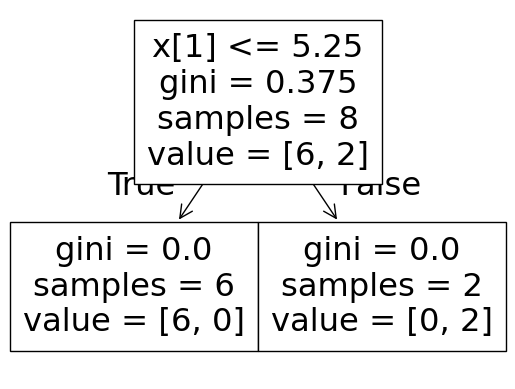

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


1.0


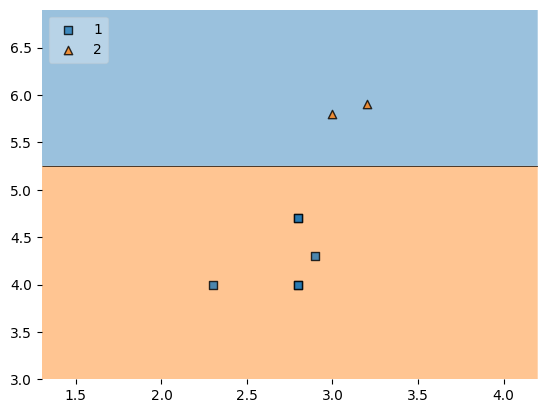

In [184]:
dt_bag1 = DecisionTreeClassifier()
evaluate(dt_bag1,X,y)

In [185]:
# Data For tree 1
df_bag = df_train.sample(8,replace= True)

X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]


df_bag

,sepal_width,petal_length,species
73,2.8,4.7,1
143,3.2,5.9,2
97,2.9,4.3,1
91,3.0,4.6,1
95,3.0,4.2,1
76,2.8,4.8,1
76,2.8,4.8,1
95,3.0,4.2,1


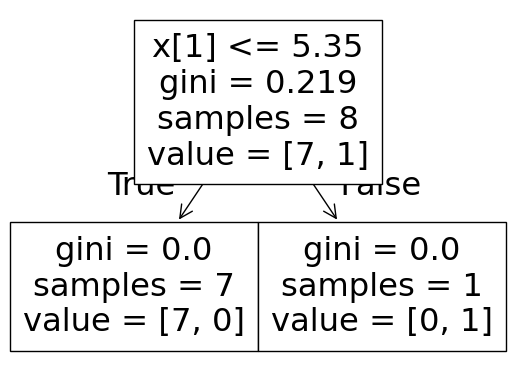

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


1.0


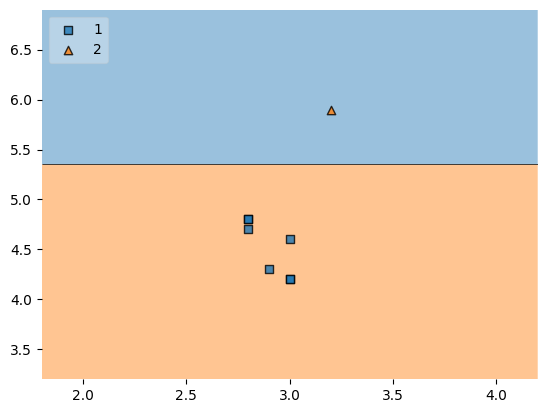

In [186]:
dt_bag2 = DecisionTreeClassifier()
evaluate(dt_bag2,X,y)

In [187]:
# Data For tree 1
df_bag = df_train.sample(8,replace= True)

X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]


df_bag

,sepal_width,petal_length,species
73,2.8,4.7,1
71,2.8,4.0,1
117,3.8,6.7,2
76,2.8,4.8,1
91,3.0,4.6,1
91,3.0,4.6,1
97,2.9,4.3,1
91,3.0,4.6,1


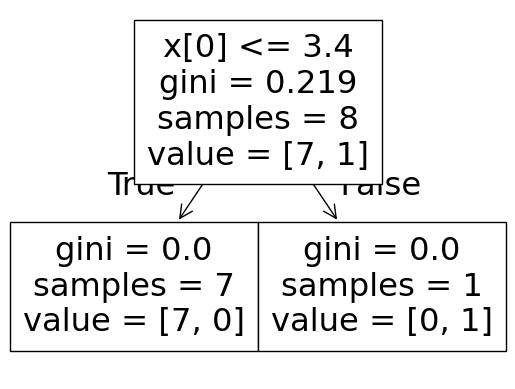

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.6


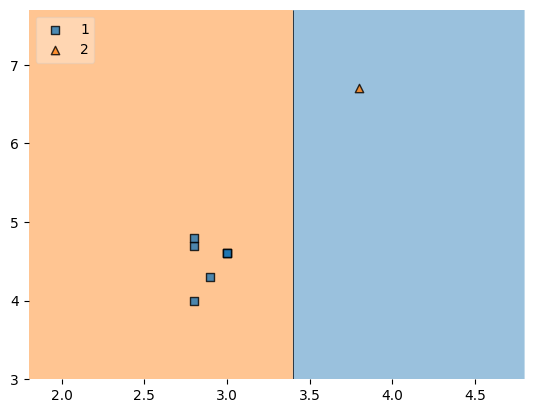

In [188]:
dt_bag3 = DecisionTreeClassifier()
evaluate(dt_bag3,X,y)

# Predict....

In [189]:
df_test

,sepal_width,petal_length,species
98,2.5,3.0,1
69,2.5,3.9,1
108,2.5,5.8,2
75,3.0,4.4,1
52,3.1,4.9,1


In [190]:
print("Predictor 1",dt_bag1.predict(np.array([3.6,6.1]).reshape(1,2)))
print("Predictor 2",dt_bag2.predict(np.array([3.6,6.1]).reshape(1,2)))
print("Predictor 3",dt_bag3.predict(np.array([3.6,6.1]).reshape(1,2)))

Predictor 1 [2]
Predictor 2 [2]
Predictor 3 [2]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


#Pasting

In [191]:
# Row sampling without replacement .....
df_train

,sepal_width,petal_length,species
95,3.0,4.2,1
71,2.8,4.0,1
143,3.2,5.9,2
129,3.0,5.8,2
97,2.9,4.3,1
76,2.8,4.8,1
53,2.3,4.0,1
91,3.0,4.6,1
117,3.8,6.7,2
73,2.8,4.7,1


In [192]:
df_train.sample(8)

,sepal_width,petal_length,species
91,3.0,4.6,1
71,2.8,4.0,1
129,3.0,5.8,2
143,3.2,5.9,2
95,3.0,4.2,1
76,2.8,4.8,1
73,2.8,4.7,1
53,2.3,4.0,1


# Random Subspaces ....

In [193]:
df1 = pd.read_csv('/content/IRIS.csv')
df1 = df1.sample(10)

In [194]:
df1

,sepal_length,sepal_width,petal_length,petal_width,species
130,7.4,2.8,6.1,1.9,Iris-virginica
138,6.0,3.0,4.8,1.8,Iris-virginica
109,7.2,3.6,6.1,2.5,Iris-virginica
91,6.1,3.0,4.6,1.4,Iris-versicolor
30,4.8,3.1,1.6,0.2,Iris-setosa
63,6.1,2.9,4.7,1.4,Iris-versicolor
47,4.6,3.2,1.4,0.2,Iris-setosa
19,5.1,3.8,1.5,0.3,Iris-setosa
41,4.5,2.3,1.3,0.3,Iris-setosa
22,4.6,3.6,1.0,0.2,Iris-setosa


In [195]:
df1.sample(2,replace = True,axis = 1)

,species,sepal_length
130,Iris-virginica,7.4
138,Iris-virginica,6.0
109,Iris-virginica,7.2
91,Iris-versicolor,6.1
30,Iris-setosa,4.8
63,Iris-versicolor,6.1
47,Iris-setosa,4.6
19,Iris-setosa,5.1
41,Iris-setosa,4.5
22,Iris-setosa,4.6


# Random Patches...

In [196]:
df1

,sepal_length,sepal_width,petal_length,petal_width,species
130,7.4,2.8,6.1,1.9,Iris-virginica
138,6.0,3.0,4.8,1.8,Iris-virginica
109,7.2,3.6,6.1,2.5,Iris-virginica
91,6.1,3.0,4.6,1.4,Iris-versicolor
30,4.8,3.1,1.6,0.2,Iris-setosa
63,6.1,2.9,4.7,1.4,Iris-versicolor
47,4.6,3.2,1.4,0.2,Iris-setosa
19,5.1,3.8,1.5,0.3,Iris-setosa
41,4.5,2.3,1.3,0.3,Iris-setosa
22,4.6,3.6,1.0,0.2,Iris-setosa


In [197]:
df1.sample(8,replace = True).sample(2,replace = True,axis = 1)

,petal_length,sepal_width
47,1.4,3.2
41,1.3,2.3
47,1.4,3.2
138,4.8,3.0
19,1.5,3.8
30,1.6,3.1
30,1.6,3.1
19,1.5,3.8
